# <h><center>**Black Friday Sales**</center></h>
<h><center>**By Anju Rajbangshi and Puja Sarkar from Hook, Line and Thinker**</center></h>


![alt text](blackfriday-predictions-2018.png "Title")

<i>EBlack Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. 
    
   A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for a selected high volume products from last month.
They want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

The train data had ~ 5.5 lakh observations and the test data had ~ 2.3 lakh observations. </i>

#### Problem
<i>The challenge was to predict the purchase amount of various products by users across categories given historic data of purchase amounts.

We can categorize this problem as a Regression task. Our algorithm is expected to predict the purchase amount a client is expected to spend on this day.</i>

# Approach

<ol>
<li>Exploratory data analysis (EDA);</li>
<li>Data Pre-processing;</li>
<li>Feature engineering;</li>
    <li>Feature Transformation;</li>
    <li>Modeling;</li>
</ol>





<img src=approach.png style="width=200;height=400">

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

import scipy as sp
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pf
from pandas_profiling import ProfileReport

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import make_scorer, accuracy_score #accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #hyper parameter optimization
from sklearn.metrics import confusion_matrix #accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics

In [5]:
data = pd.read_csv('C:/Users/Hp/Desktop/Imarticus/Dataset/black-friday/train.csv')

In [4]:
#profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [5]:
profile = ProfileReport(data, minimal=True)
#profile.to_file(output_file="output.html")

In [6]:
profile

In [45]:
from IPython.display import FileLink, FileLinks
FileLink('output.html')

C:\Users\Hp\output.html

In [7]:
#Let see the first five rows of the dataset
data.head()

#Lets see some statistics about the data
data.describe()

#Lets see present total Nans in each column
data.isnull().sum()

data.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

(550068, 12)

In [7]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.672659
Product_Category_2    31.566643
dtype: float64 %


The column Product_Category_2 posses around 30% of missing data. Here it makes sense to fill missing values.
Whereas, the column Product_Category_3 posses around 70% of missing data. So, here the missing values are being imputed by 0.

30% of real data is a small ratio, we could fill missing values inside this category with the mean of the existing values, but that means that 70% of data will be artificial, which could ruin our future machine learning model. 

In [8]:
#data=data.fillna(0)
data['Product_Category_2'].fillna((data['Product_Category_2'].mean()), inplace=True)
data['Product_Category_3']=data['Product_Category_3'].fillna(0)

In [9]:
data.isnull().sum().sum()

0

In [11]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':',data[i].nunique())

Unique Values for Each Feature: 

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 18
Product_Category_3 : 16
Purchase : 18105


In [12]:
# Info about products
print('Number of products:',data['Product_ID'].nunique())
print('Number of categories:',data['Product_Category_1'].unique().max())

Number of products: 3631
Number of categories: 20


In [13]:
print('Number of shoppers:',data['User_ID'].nunique())
print('Years in city:',data['Stay_In_Current_City_Years'].unique())
print('Age Groups:',data['Age'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables. Furthermore, the dataset contains two short type variables: Product_Category_2 and Product_Category_3.

# Exploring the data for insights

### 1. Gender and age

M    414259
F    135809
Name: Gender, dtype: int64

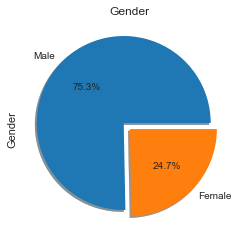

In [14]:
count_gender=data["Gender"].value_counts()
count_gender
data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), 
                                       labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)

The graph shows that there are almost 3 times more male customers than female customers!
Maybe male visitors are more likely to go out and buy something for their ladies when more deals are present.

Let's explore the Gender category a bit more. We want to see now distribution of gender variable, but taking into consideration the Age category. Once again countplot function will be used, but now with defined hue parameter.

In [15]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

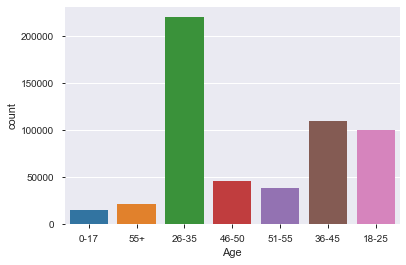

In [16]:
data['Age'].value_counts()
sns.countplot(data['Age'])

Text(0.5, 1.0, 'Age&Gender')

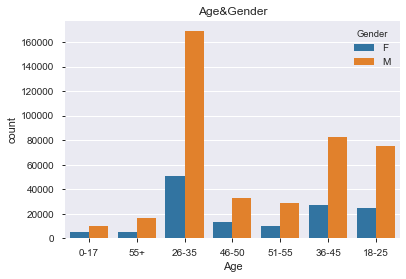

In [17]:
sns.countplot(data["Age"], hue=data["Gender"]).set_title("Age&Gender")

From the age and gender figures, we can see several interesting things. First of all, the main customers for black friday sale are male(over 70 percent), especially those of age 26-35, who account for almost one third of male cuntomers of all ages. 

From the figure above, we can easily conclude that the highest number of customers belong to the age group between 26 and 35, for both genders. Younger and older population are far less represented on Black Friday. Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.

([<matplotlib.axis.XTick at 0x2961ee765c8>,
 <a list of 2 Text xticklabel objects>)

Text(0.5, 1.0, 'Mean purchase of different gender')

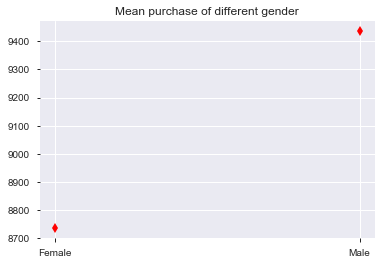

In [18]:
x = data.groupby(["Gender"]).mean()[["Purchase"]].index
y = data.groupby(["Gender"]).mean()[["Purchase"]].values
plt.plot(x, y,'rd')
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")

Secondly, the figure of mean purchase of different gender shows that individual male customer also spends more than their female counterpart. 

In spite of gender, people between age of 18 and 45 have made up the most of black friday sales. 
Young men showed greater purchasing power overall, but it's also possible that male customers are paying when shopping together with females.

### 2.User ID

In [19]:
data['User_ID'].nunique()
data['Product_ID'].nunique()

5891

3631

we analyze the User_ID column using the nunique method. From this we can conclude that in this specific retail store, during Black Friday, 5,891 different customers have bought something from the store. Also, from Product_ID category we can extract information that 3,631 different products are sold.

### 3. City

City_Category variable is the next one. This category gives us information about cities from which our customers are.

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

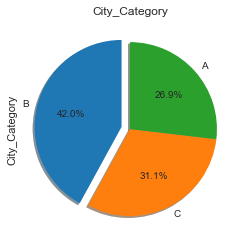

In [20]:
city_count=data["City_Category"].value_counts()
city_count
city_count.plot.pie(title="City_Category", 
                        startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

It is evident from the pie chart that all the three cities are almost equally represented in the retail store during Black Fridays. Maybe the store is somewhere between these three cities, is easily accessible and has good road connections from these cities.

In [21]:
#Purchase city wise
citygroup=data.groupby("City_Category")["Purchase"].sum()
citygroup

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

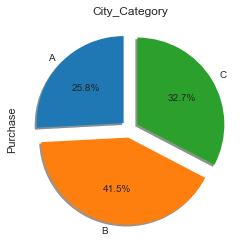

In [22]:
citygroup.plot.pie(title="City_Category", startangle=90, explode=(0.1, 0.1, 0.1), autopct="%1.1f%%", shadow=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

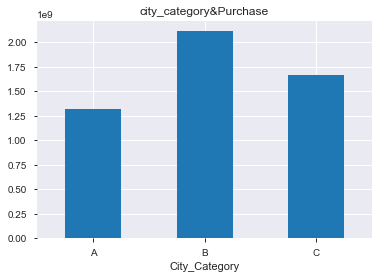

In [23]:
citygroup.plot.bar(title="city_category&Purchase")
plt.xticks(rotation=360)
sns.despine()

Text(0.5, 1.0, 'Mean purchase of different city categories')

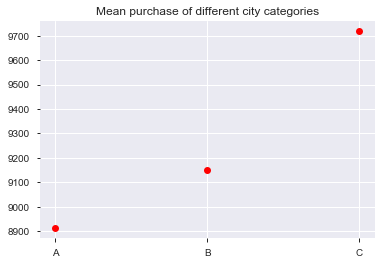

In [24]:
x = data.groupby(["City_Category"]).mean()[["Purchase"]].index
y = data.groupby(["City_Category"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.title("Mean purchase of different city categories")
sns.despine()

Customers from C_category cities make up more than half of our black friday sales. 
Surprisingly, although there are not very many customers from B_type city. 
On the contrary, we didn't get very many customers from A_type city and they spent the least in our store. 
This can be noted when making future marketing plans.

### 4.Occupation

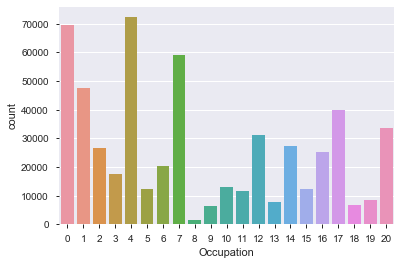

In [25]:
sns.countplot(data['Occupation'])

<BarContainer object of 21 artists>

([<matplotlib.axis.XTick at 0x296211ab208>,
 <a list of 21 Text xticklabel objects>)

Text(0, 0.5, 'Purchase amount')

Text(0.5, 1.0, 'Occupation ID')

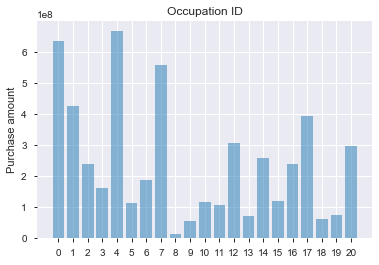

In [53]:
#Purchase Occupation wise
occupation_group=data.groupby("Occupation")["Purchase"].sum()
#occupation_group
objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, occupation_group, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Purchase amount')
plt.title('Occupation ID')

#plt.show()

<b>Purchase Occupation wise:-</b>
![alt text](occvspurchase.png "Title")

### 5. Marital_Status

In [27]:
data['Marital_Status'].value_counts()
#0 for single, 1 for married

0    324731
1    225337
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Occupation Distribution')

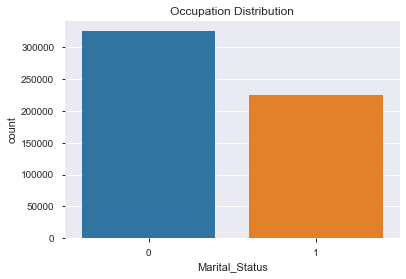

In [28]:
sns.countplot(data['Marital_Status'])
plt.title('Occupation Distribution')
plt.show()

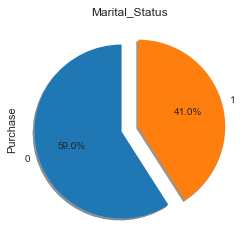

In [29]:
#Purchase Marital_Status wise
Marital_Status_group=data.groupby("Marital_Status")["Purchase"].sum()
Marital_Status_group.plot.pie(title="Marital_Status", startangle=90, explode=(0.1, 0.1), autopct="%1.1f%%", shadow=True)

In [30]:
data['Purchase'].sum()

5095812742

In [31]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### 4. Residence Stability

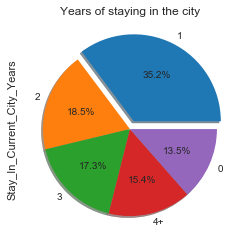

In [32]:
data["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city",
                                                explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)

New residents(one year or less) consist of around half of our black friday customers, which shows that gthe store appears to be more popular for new comers. People who have been living in current city for longer spend a bit more than new comers. Since they chose to stay with the store, we do need to find out what kept them loyal so that better plans can be made to keep more customers instead of losing them over time.

### 5. Product

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

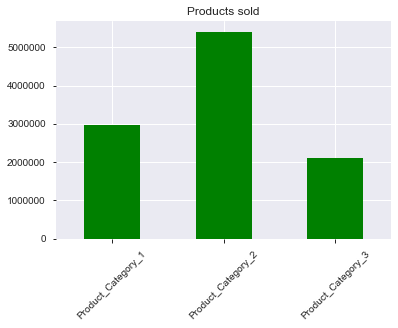

In [41]:
data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="green")
plt.xticks(rotation=45)

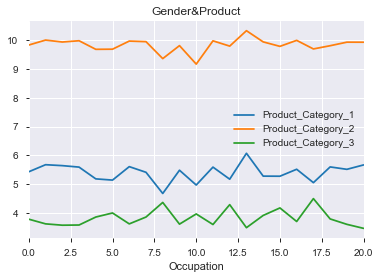

In [34]:
#data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Gender&Product")

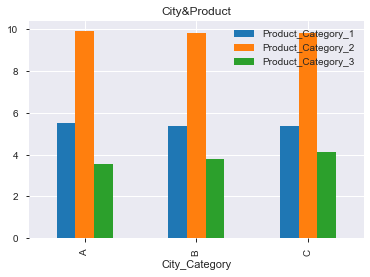

In [10]:
data.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="City&Product")

Products under category 2 are our most popular items, and this is true for all kinds of customers coming from different backgrounds.

Above is some analysis about trends of our black friday sale as well as correlations between different demograghical features and purchase, these relationships can be valuable when trying to maximize profit. Now we will try to predict future sales with these data.

### 6.Purchase(target variable)

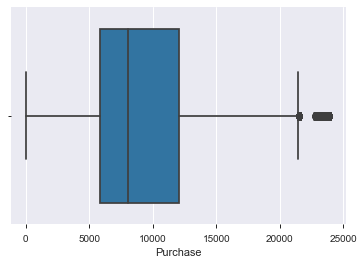

In [36]:
sns.boxplot(data['Purchase'])
plt.show()

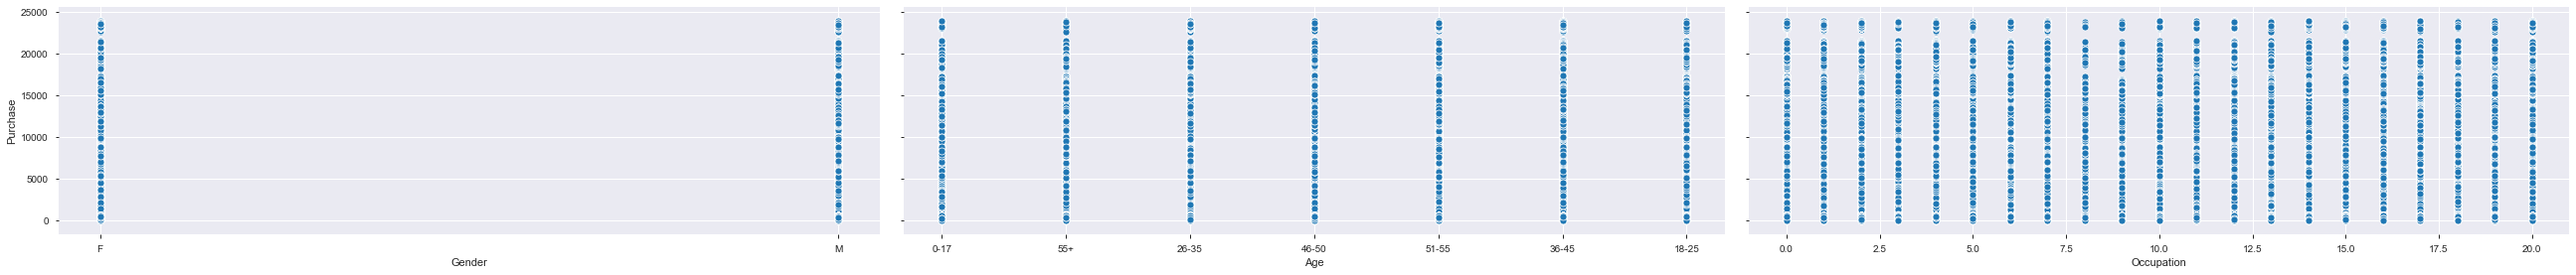

In [37]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['Gender', 'Age', 'Occupation'], y_vars='Purchase', height=4, aspect=3, kind='scatter')
plt.show()

### Predict future Sales(Purchase)

In [55]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Text(0.5, 1, 'Correlation between features')

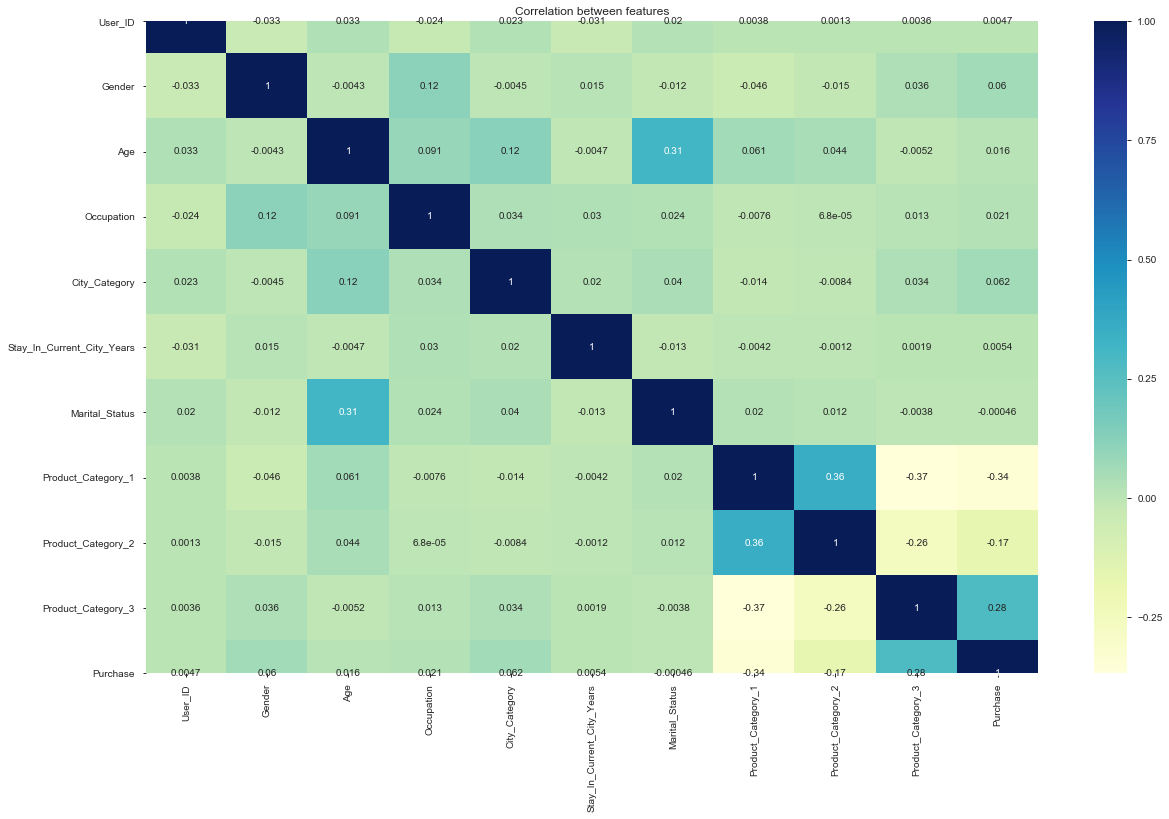

In [91]:
#data.info()
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

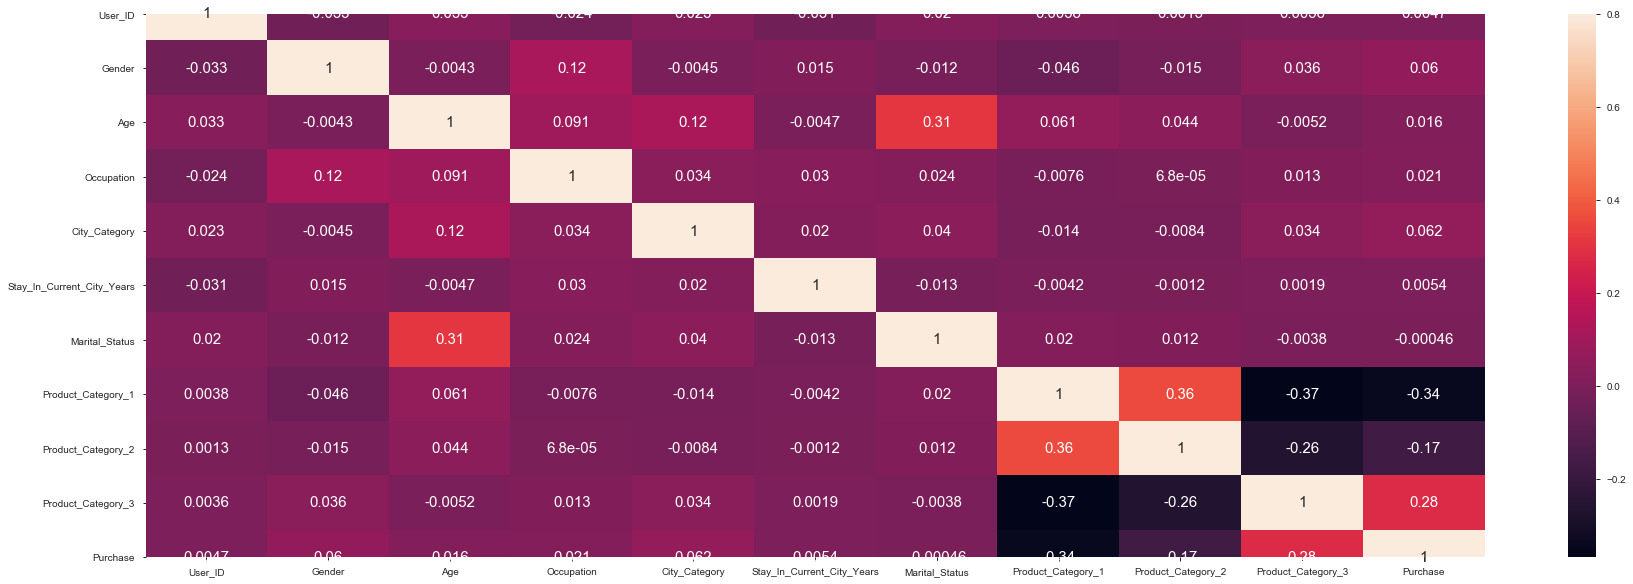

In [88]:
#correlation matrix

corr = data.corr()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 15}, annot=True);

From the heatmap above we can observe there are strong correlations between different types' products and purchase. There is also some correlation between age and marital status which is in line with common sense. Unfortunately, there is no single feature that shows strong correlation with purchase directly, so we can understand this as that purchase depends on the ensemble of all features.

User_ID is is the number assigned automatically to each customer, and it is not useful for prediction purposes.

The Product_ID column contains information about the product purchased. It is not a feature of the customer. Therefore, we will remove that too.

In [ ]:
# data = data.drop(['User_ID','Product_ID'], axis=1)
# data.info()

In [57]:
# #Function for Label encoding as Embarked is an object here.

def encode_features(df_train):
    features = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
    df_combined = df_train[features].copy()
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        #df_test[feature] = le.transform(df_test[feature])
    return df_train
data_final=encode_features(data)

# df_Gender = pd.get_dummies(data['Gender'])
# df_Age = pd.get_dummies(data['Age'])
# df_City_Category = pd.get_dummies(data['City_Category'])
# df_Stay_In_Current_City_Years = pd.get_dummies(data['Stay_In_Current_City_Years'])

# data_final = pd.concat([data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final = data_final.drop(['User_ID','Product_ID'], axis=1)
data.info()

data_final.head()
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int32(4), int64(7), object(1)
memory usage: 42.0+ MB


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,2,8,0,8370
1,0,0,10,0,2,0,0,4,11,15200
2,0,0,10,0,2,0,11,8,0,1422
3,0,0,10,0,2,0,11,13,0,1057
4,1,6,16,2,4,0,7,8,0,7969


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int32(4), int64(6)
memory usage: 33.6 MB


In [58]:
data.columns
data_final.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Data Preprocessing for ML Algorithms

In [59]:
ind = data_final[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]
dep = data_final['Purchase']

In [60]:
#spliting dataset into 70% training set and 30% test set:

ind_train,ind_test,dep_train,dep_test=train_test_split(ind,dep,test_size=0.3, random_state=100)

## Linear Regression

In [61]:
lm = LinearRegression()
lm.fit(ind_train, dep_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
#print('Intercept parameter:', lm.intercept_)
#coeff_df = pd.DataFrame(lm.coef_, ind_train.columns, columns=['Coefficient'])
#print(coeff_df)

#Prediction with test value
linreg_prediction=lm.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': linreg_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, linreg_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, linreg_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, linreg_prediction)))
print('RSquare:', r2_score(dep_test,linreg_prediction))
print('VIF:', 1/(1-r2_score(dep_test,linreg_prediction)))

accuracy = lm.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,6582.597577
544675,13692,9658.963296
433588,8592,10581.273092
123193,2761,9573.338920
161124,15918,12050.338727


MAE: 3541.030474080599
MSE: 21502943.057353113
RMSE: 4637.126594924179
RSquare: 0.149799970236296
VIF: 1.176193795568238
14.979997023629599 %


In [63]:
#Prediction with train value
linreg_prediction=lm.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': linreg_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, linreg_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, linreg_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, linreg_prediction)))
print('RSquare:', r2_score(dep_train,linreg_prediction))
print('VIF:', 1/(1-r2_score(dep_train,linreg_prediction)))

accuracy = lm.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,7191.583688
366955,5385,8985.512461
267012,3523,8635.468197
516764,15667,12434.594859
358915,20680,11006.246890


MAE: 3530.5283978178086
MSE: 21376862.22043866
RMSE: 4623.51189253782
RSquare: 0.15187998586288953
VIF: 1.179078412643539
15.187998586288954 %


# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(ind_train, dep_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [66]:
#Prediction with test value
dt_prediction=dt.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': dt_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, dt_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, dt_prediction)))
print('RSquare:', r2_score(dep_test,dt_prediction))
print('VIF:', 1/(1-r2_score(dep_test,dt_prediction)))

accuracy = dt.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,4412.909091
544675,13692,13035.000000
433588,8592,8715.000000
123193,2761,2174.444444
161124,15918,11913.166667


MAE: 2373.712010770065
MSE: 11342843.143108979
RMSE: 3367.9137671723392
RSquare: 0.55151787584823
VIF: 2.229743274364246
55.151787584823 %


In [67]:
#Prediction with train value
dt_prediction=dt.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': dt_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, dt_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, dt_prediction)))
print('RSquare:', r2_score(dep_train,dt_prediction))
print('VIF:', 1/(1-r2_score(dep_train,dt_prediction)))

accuracy = dt.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,5790.851852
366955,5385,5385.000000
267012,3523,5773.000000
516764,15667,16968.800000
358915,20680,20675.000000


MAE: 1455.6282456161857
MSE: 4797340.289482876
RMSE: 2190.2831528099
RSquare: 0.8096670936931709
VIF: 5.253952242960734
80.96670936931709 %


# Random Forest

In [68]:
rf=RandomForestRegressor()

#fit the best algorithm 
rf.fit(ind_train,dep_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [69]:
#Prediction with test value
rf_prediction=rf.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': rf_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, rf_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, rf_prediction)))
print('RSquare:', r2_score(dep_test,rf_prediction))
print('VIF:', 1/(1-r2_score(dep_test,rf_prediction)))

accuracy = rf.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,4453.496356
544675,13692,13070.741667
433588,8592,8238.500000
123193,2761,2184.962832
161124,15918,12194.229643


MAE: 2252.7384918299713
MSE: 9664027.485934077
RMSE: 3108.701897244906
RSquare: 0.6178961905696554
VIF: 2.6170898465808006
61.78961905696554 %


In [70]:
#Prediction with train value
rf_prediction=rf.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': rf_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, rf_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, rf_prediction)))
print('RSquare:', r2_score(dep_train,rf_prediction))
print('VIF:', 1/(1-r2_score(dep_train,rf_prediction)))

accuracy = rf.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,5803.060548
366955,5385,5346.884444
267012,3523,5771.389816
516764,15667,17389.810476
358915,20680,20675.733333


MAE: 1649.3242225511672
MSE: 5300173.508981159
RMSE: 2302.2105700784973
RSquare: 0.7897173502354174
VIF: 4.75550408518976
78.97173502354174 %


# XGBoost

In [71]:
import xgboost as xgb

In [72]:
xg=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
#fit the best algorithm 
xg.fit(ind_train,dep_train)

C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:56:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [73]:
#Prediction with test value
xg_prediction=rf.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': xg_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, xg_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, xg_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, xg_prediction)))
print('RSquare:', r2_score(dep_test,xg_prediction))
print('VIF:', 1/(1-r2_score(dep_test,xg_prediction)))

accuracy = xg.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,4453.496356
544675,13692,13070.741667
433588,8592,8238.500000
123193,2761,2184.962832
161124,15918,12194.229643


MAE: 2252.7384918299713
MSE: 9664027.485934077
RMSE: 3108.701897244906
RSquare: 0.6178961905696554
VIF: 2.6170898465808006
-15.25089108814408 %


In [74]:
#Prediction with train value
xg_prediction=xg.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': xg_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, xg_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, xg_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, xg_prediction)))
print('RSquare:', r2_score(dep_train,xg_prediction))
print('VIF:', 1/(1-r2_score(dep_train,xg_prediction)))

accuracy = xg.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,4822.973145
366955,5385,5347.726074
267012,3523,5342.529785
516764,15667,7493.980469
358915,20680,8388.821289


MAE: 4073.2417484321263
MSE: 29210550.00973066
RMSE: 5404.678529730576
RSquare: -0.15891901401314112
VIF: 0.8628730635259565
-15.891901401314112 %


# Ridge

In [75]:
from sklearn.linear_model import Ridge

In [76]:
ridge = Ridge()
ridge.fit(ind_train,dep_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
#Prediction with test value
ridge_prediction=ridge.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': ridge_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, ridge_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, ridge_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, ridge_prediction)))
print('RSquare:', r2_score(dep_test,ridge_prediction))
print('VIF:', 1/(1-r2_score(dep_test,ridge_prediction)))

accuracy = ridge.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,6582.597554
544675,13692,9658.970115
433588,8592,10581.277627
123193,2761,9573.336091
161124,15918,12050.339596


MAE: 3541.0303829025697
MSE: 21502943.13289537
RMSE: 4637.126603069552
RSquare: 0.14979996724944777
VIF: 1.1761937914361371
14.979996724944778 %


In [78]:
#Prediction with train value
ridge_prediction=ridge.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': ridge_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, ridge_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, ridge_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, ridge_prediction)))
print('RSquare:', r2_score(dep_train,ridge_prediction))
print('VIF:', 1/(1-r2_score(dep_train,ridge_prediction)))

accuracy = ridge.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,7191.581531
366955,5385,8985.509907
267012,3523,8635.468201
516764,15667,12434.593578
358915,20680,11006.244338


MAE: 3530.528300912711
MSE: 21376862.220447924
RMSE: 4623.511892538822
RSquare: 0.15187998586252194
VIF: 1.1790784126430278
15.187998586252194 %


# Lasso

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(ind_train,dep_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
#Prediction with test value
lasso_prediction=lasso.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': lasso_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, lasso_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, lasso_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, lasso_prediction)))
print('RSquare:', r2_score(dep_test,lasso_prediction))
print('VIF:', 1/(1-r2_score(dep_test,lasso_prediction)))

accuracy = lasso.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,6585.715817
544675,13692,9665.656245
433588,8592,10584.261693
123193,2761,9571.267978
161124,15918,12054.523616


MAE: 3540.9288781619075
MSE: 21502913.95478681
RMSE: 4637.123456927453
RSquare: 0.1498011209161202
VIF: 1.1761953874575044
14.98011209161202 %


In [81]:
#Prediction with train value
lasso_prediction=lasso.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': lasso_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, lasso_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, lasso_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, lasso_prediction)))
print('RSquare:', r2_score(dep_train,lasso_prediction))
print('VIF:', 1/(1-r2_score(dep_train,lasso_prediction)))

accuracy = lasso.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,7187.629308
366955,5385,8981.716680
267012,3523,8638.287356
516764,15667,12436.328917
358915,20680,11004.382849


MAE: 3530.4280050922343
MSE: 21376875.870849386
RMSE: 4623.513368732633
RSquare: 0.15187944428731037
VIF: 1.179077659731621
15.187944428731036 %


### Random Forest Gridsearch

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(ind_train,dep_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy from the Algorithms:
![alt text](accuracy.jpg)

Corelation Matrix:
![alt text](corelation.png)

In [92]:
ind1 = data_final[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2']]
dep1 = data_final['Purchase']

In [93]:
#spliting dataset into 70% training set and 30% test set:

ind_train1,ind_test1,dep_train1,dep_test1=train_test_split(ind1,dep1,test_size=0.3, random_state=100)

In [94]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(ind_train1, dep_train1)

#Prediction with test value
dt_prediction=dt.predict(ind_test1)

df = pd.DataFrame({'Actual': dep_test1, 'Predicted': dt_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test1, dt_prediction))
print('MSE:', metrics.mean_squared_error(dep_test1, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test1, dt_prediction)))
print('RSquare:', r2_score(dep_test1,dt_prediction))
print('VIF:', 1/(1-r2_score(dep_test1,dt_prediction)))

accuracy = dt.score(ind_test1,dep_test1)
print(accuracy*100,'%')


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

,Actual,Predicted
343184,3051,4412.909091
544675,13692,11164.000000
433588,8592,8715.000000
123193,2761,2190.000000
161124,15918,12746.000000


MAE: 2280.9877963284157
MSE: 10110152.908234827
RMSE: 3179.6466640548015
RSquare: 0.6002569378261228
VIF: 2.5016068935926334
60.02569378261228 %


In [95]:
#Prediction with train value
dt_prediction=dt.predict(ind_train1)

df = pd.DataFrame({'Actual': dep_train1, 'Predicted': dt_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train1, dt_prediction))
print('MSE:', metrics.mean_squared_error(dep_train1, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train1, dt_prediction)))
print('RSquare:', r2_score(dep_train1,dt_prediction))
print('VIF:', 1/(1-r2_score(dep_train1,dt_prediction)))

accuracy = dt.score(ind_train1,dep_train1)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,5790.851852
366955,5385,6245.500000
267012,3523,5673.800000
516764,15667,13803.111111
358915,20680,15541.800000


MAE: 1745.8683574166416
MSE: 6224913.522308984
RMSE: 2494.9776596813413
RSquare: 0.7530285927793827
VIF: 4.049051715151419
75.30285927793827 %


# Conclusion:

    After dropping Product category 3, 
      MAE: 2280.9
      RMSE: 3179.6
      RSquare: 0.60
      VIF: 2.5
      Accuracy:60.0 %
    

<b><i>
        The ML algorithm that perform the best was Decision Tree Model with RMSE = 2253 with an accuracy of 61.7%
    </i></b>

![alt text](thanks.jpg)